<a href="https://colab.research.google.com/github/ninabohon/easy_stylegan2_training/blob/main/easy_StyleGAN2_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training StyleGAN2-ADA
## PyTorch
### very very easy! 

Using a small dataset of minecraft faces I found on kaggle, I trained a network and generated new, fake images.

Dataset: https://www.kaggle.com/sebastianponce/minecraft-player-faces

Here is how I structured my files (a screenshot is worth a thousand words) 


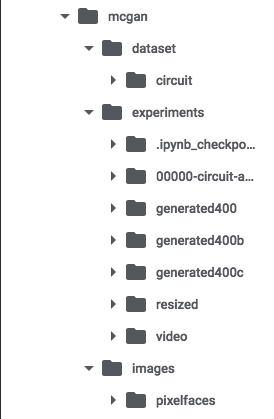



If you are following this to train your own network, create three folders: datasets, experiments and images. Place your dataset into "Images" (mine was called pixelfaces, it contains the minecraft faces). Everything else will be generated on the go. 

Mount your drive to the notebook:

In [ ]:
# mounting google drive to my notebook
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Mounted")
except:
    print("Not mounted")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Images
Before starting the training, some changes to the images in my dataset needed to be made. Firstly, my images were not in RGB, their size was not a power of two as required and I also decided to make them much much smaller to decrease the training time.

In [ ]:
# checking the format of images

from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/mcgan/images/pixelfaces'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

base_size = None
for file in tqdm(files):
  file2 = os.path.join(IMAGE_PATH,file)
  img = Image.open(file2)
  sz = img.size
  if base_size and sz!=base_size:
    print(f"Inconsistant size: {file2}")
  elif img.mode!='RGB':
    print(f"Inconsistant color format: {file2}")
  else:
    base_size = sz

# for StyleGAN2, the size of image MUST be a power of two
# images have to be in RGB

  0%|          | 0/317 [00:00<?, ?it/s]

In [ ]:
# to see what color format an image is in:
# my images were previously in mode 'P', which stands for palette

from PIL import Image

img = Image.open('/content/drive/MyDrive/data/mcgan/images/pixelfaces/256.png')
img.mode

'RGB'

In [ ]:
# converting images into RGB

from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/mcgan/images/pixelfaces'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

for file in tqdm(files):
  file2 = os.path.join(IMAGE_PATH,file)
  img = Image.open(file2)
  converted = img.convert("RGB")
  converted.save(file2)

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
# I resized my images to 8x8 to make the training faster (minecraft faces have 8x8 pixels)
# in this way, the network did not need to learn how to generate the shape of a pixel and the training time was reduced

from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/mcgan/images/pixelfaces/'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

for file in tqdm(files):
  file2 = os.path.join(IMAGE_PATH,file)
  img = Image.open(file2)
  converted = img.resize((8,8), Image.LANCZOS)
  converted.save('/content/drive/MyDrive/data/mcgan/images/pixelfaces/'+file)

  0%|          | 0/303 [00:00<?, ?it/s]

## Training StyleGAN2

Before starting training, you need to change runtime type on colab. Go to Runtime > Change runtime type  and set Hardware accelerator to GPU. 

Beware that if you are training for too long/using too much computing power, you will eventually be kicked out. Usually, you will be able to continue your training after a day or two from your network snapshots. Alernatively, you can also sign up for Colab Pro and gain access to better hardware and longer training times. However, Colab pro is only available in a few countries.

StyleGAN2-ada-pytorch is not compatible with the newest pytorch version. I used version 1.7.0

In [ ]:
!pip install torch==1.7.0 torchvision==0.8.0 torchaudio==0.7.0

I cloned this repository from github and installed ninja.

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

I used the dataset_tool.py to move files from my data folder into the circuit folder for the training.

This also tests whether the images are formatted correctly. If not, it throws an error without much additional information (as mentioned above, images I had were palette. If your images are not a power a two or are in an incorrect format, this will throw an error)

In [ ]:
!python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/data/mcgan/images/pixelfaces --dest /content/drive/MyDrive/data/mcgan/dataset/circuit


100% 108/108 [00:01<00:00, 97.13it/s]


Start training!
This will take quite some time, depending on the size of your images.

With each snapshot, an image of fakes will be generated. It gives you an idea of how the images of your current model look. A .pkl file of your network is made, you can use this to continue training if you decide to resume the process (or are kicked out of colab). All the logs will be saved under log.txt

When you are happy with the fakes and the FID score (https://en.wikipedia.org/wiki/Fr%C3%A9chet_inception_distance) is getting lower, you can go on and generate your images from the trained network!

To give you an idea: I was training for 4h 21m with my tiny little dataset of tiny little images. You might want to start easy and not be too ambitious (as I was the first time I tried to run this) 😅


In [ ]:
import os

# Experiments: this is where files from this training will be saved
EXPERIMENTS = "/content/drive/MyDrive/data/mcgan/experiments"
# Data: directory with my data
DATA = "/content/drive/MyDrive/data/mcgan/dataset/circuit"
# how often will a snapshot of the network be taken (in my case, every 10 ticks)
SNAP = 10

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

##Generating images
I decided not to train further, as I saw that my FID scores were not getting any better (aim for a low FID score number).
Images that were made during snapshots seemed good enough for me.
I went with network-snapshot-400.pkl, as it had the lowest FID score.

Here is what fakes400 looked like: 
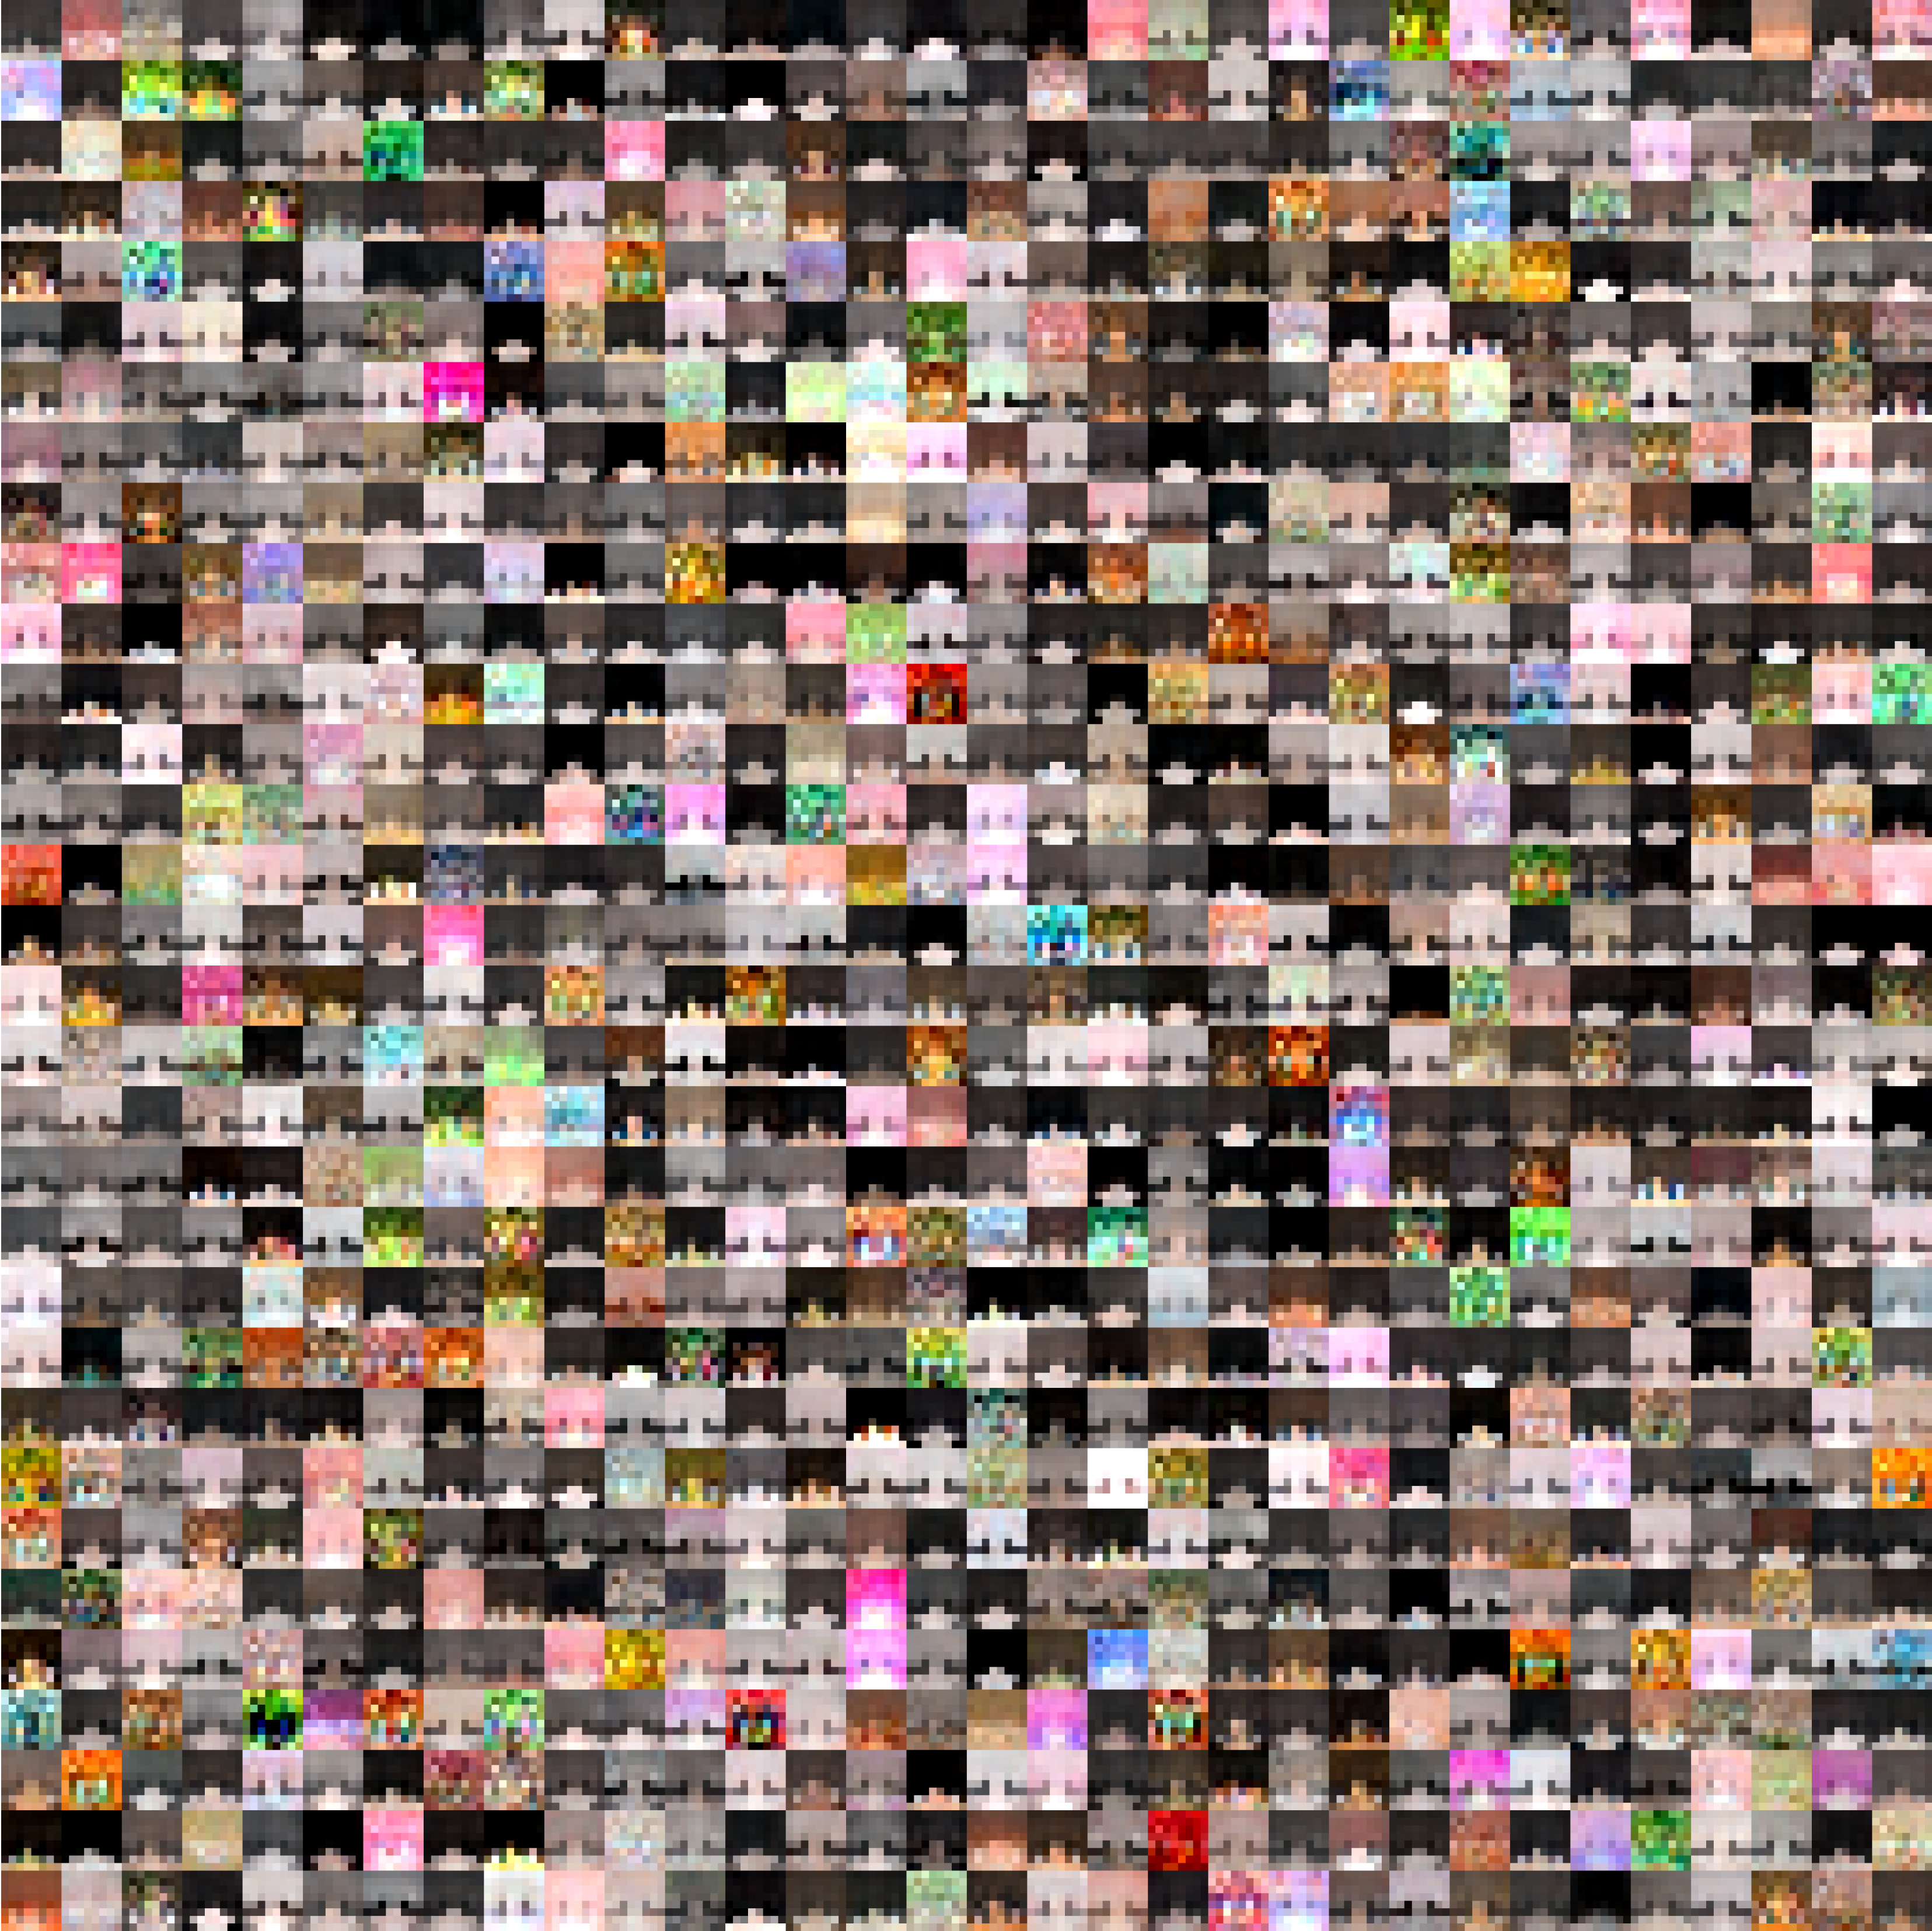

In [ ]:
!python '/content/stylegan2-ada-pytorch/generate.py' --outdir='/content/drive/MyDrive/data/mcgan/experiments/generated400' --trunc=1 --seeds=500-600 --network='/content/drive/MyDrive/data/mcgan/experiments/network-snapshot-400.pkl'

##Images & Video
I resized the images to 128x128 and created a video for presentation purposes. This is *not* latent space interpolation.

link to the video: https://drive.google.com/file/d/1-4k54IY_GQhfjOf5CCXTtM6FeAVP_z_s/view?usp=sharing

In [ ]:
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/mcgan/experiments/generated400/'

img = Image.open(IMAGE_PATH)
converted = img.resize((128,128), Image.BOX)
converted.save('/content/drive/MyDrive/data/mcgan/experiments/resized/'+file)

In [ ]:
import os
import cv2 
from PIL import Image 

IMAGE_PATH = '/content/drive/MyDrive/data/mcgan/experiments/resized/' 
video_name = 'faces.avi'
os.chdir("/content/drive/MyDrive/data/mcgan/experiments/")

images = [img for img in os.listdir(IMAGE_PATH) if img.endswith(".jpg") or img.endswith(".jpeg") or img.endswith(".png")]

print(images) 
  
frame = cv2.imread(os.path.join(IMAGE_PATH, images[0]))
  
# setting the frame width, height width
# the width, height of first image
height, width, layers = frame.shape  
  
video = cv2.VideoWriter(video_name, 0, 4, (width, height)) 
  
# Appending images to the video
for image in images: 
  video.write(cv2.imread(os.path.join(IMAGE_PATH, image))) 
      
# Deallocating memories taken for window creation
cv2.destroyAllWindows() 
video.release() 


['seed0200.png', 'seed0201.png', 'seed0202.png', 'seed0203.png', 'seed0204.png', 'seed0205.png', 'seed0206.png', 'seed0207.png', 'seed0208.png', 'seed0209.png', 'seed0210.png', 'seed0211.png', 'seed0212.png', 'seed0213.png', 'seed0214.png', 'seed0215.png', 'seed0216.png', 'seed0217.png', 'seed0218.png', 'seed0219.png', 'seed0220.png', 'seed0221.png', 'seed0222.png', 'seed0223.png', 'seed0224.png', 'seed0225.png', 'seed0226.png', 'seed0227.png', 'seed0228.png', 'seed0229.png', 'seed0230.png', 'seed0231.png', 'seed0232.png', 'seed0233.png', 'seed0234.png', 'seed0235.png', 'seed0236.png', 'seed0237.png', 'seed0238.png', 'seed0239.png', 'seed0240.png', 'seed0241.png', 'seed0242.png', 'seed0243.png', 'seed0244.png', 'seed0245.png', 'seed0246.png', 'seed0247.png', 'seed0248.png', 'seed0249.png', 'seed0250.png', 'seed0251.png', 'seed0252.png', 'seed0253.png', 'seed0254.png', 'seed0255.png', 'seed0256.png', 'seed0257.png', 'seed0258.png', 'seed0259.png', 'seed0260.png', 'seed0261.png', 'seed02